# Financial Data Structure

## Libraries Import

In [1]:
import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime

## 2.1 PCA WEIGHTS FROM A RISK DISTRIBUTION

In [4]:
sys.path.append('../../scripts')
from AFML_book_scripts import pca_weights

In [7]:
num_days = 100
num_assets = 10
mu = np.zeros(num_assets)
V = 0.01*(np.eye(num_assets)+0.2)
returns = np.random.multivariate_normal(mean=mu,cov=V,size=num_days)
returns_df = pd.DataFrame(returns, columns=[f'asset_{i+1}' for i in range(num_assets)])
cov_matrix = returns_df.cov().values

In [8]:
#no risk distr... al risk on last PC
weights = pca_weights(cov_matrix, risk_distribution= None, risk_target= 1)
weights_df = pd.DataFrame(weights, index=returns_df.columns, columns=["Weight"])
weights_df

,Weight
asset_1,-4.162275
asset_2,3.758843
asset_3,7.474532
asset_4,0.481095
asset_5,0.167325
asset_6,-2.329352
asset_7,-7.262880
asset_8,1.546268
asset_9,3.762189
asset_10,-2.738571


In [9]:
equal_risk = np.ones(num_assets) / num_assets
weights_er = pca_weights(cov_matrix, risk_distribution=equal_risk, risk_target=1)
weights_er_df = pd.DataFrame(weights_er, index=returns_df.columns, columns=["Weight"])
weights_er_df


,Weight
asset_1,1.122058
asset_2,2.008751
asset_3,1.785613
asset_4,4.609161
asset_5,1.575620
asset_6,-1.813615
asset_7,-5.716161
asset_8,-0.624515
asset_9,-5.069669
asset_10,-3.390962


## 2.2 FORM A GAPS SERIES (1-Leg Futures Spread)

In [10]:
sys.path.append('../../scripts')
from AFML_book_scripts import get_rolled_series_from_df
from AFML_book_scripts import roll_gaps
from AFML_book_scripts import generate_synthetic_futures_data


synthetic_df = generate_synthetic_futures_data()
adjusted_df = get_rolled_series_from_df(synthetic_df)

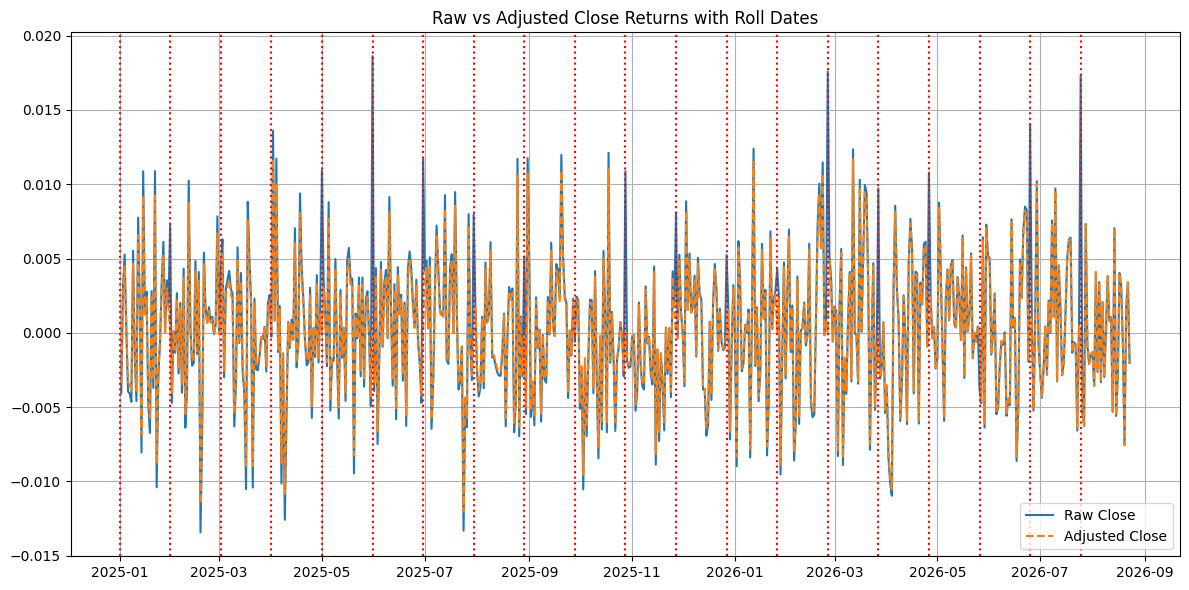

In [11]:
# Identify roll dates (i.e., where contract_id changes)
roll_dates = synthetic_df['contract_id'].ne(synthetic_df['contract_id'].shift()).loc[lambda x: x].index

plt.figure(figsize=(12, 6))
plt.plot(synthetic_df['close'].pct_change(), label='Raw Close')
plt.plot(adjusted_df['close_adj'].pct_change(), label='Adjusted Close', linestyle='--')

# Add vertical lines at roll dates
for roll_date in roll_dates:
    plt.axvline(roll_date, color='red', linestyle=':',)

plt.title("Raw vs Adjusted Close Returns with Roll Dates")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## 2.3 NON-NEGATIVE ROLLED PRICE SERIES

In [12]:
from AFML_book_scripts import compute_non_negative_rolled_price_index

synthetic_df = generate_synthetic_futures_data()
rolled_df = compute_non_negative_rolled_price_index(synthetic_df)
rolled_df[['close', 'close_adj', 'Returns', 'Price_Index']]


,close,close_adj,Returns,Price_Index
date,,,,
2025-01-01,100.720471,122.835729,NaN,NaN
2025-01-02,100.113992,122.229250,-0.006021,0.993979
2025-01-03,99.860874,121.976133,-0.002528,0.991466
2025-01-04,99.446652,121.561910,-0.004148,0.987353
2025-01-05,99.826840,121.942098,0.003823,0.991128
...,...,...,...,...
2026-08-19,142.008114,142.008114,-0.003059,1.178181
2026-08-20,142.022506,142.022506,0.000101,1.178301
2026-08-21,142.514834,142.514834,0.003467,1.182385


## 2.4 SYMMETRIC CUSUM FILTER

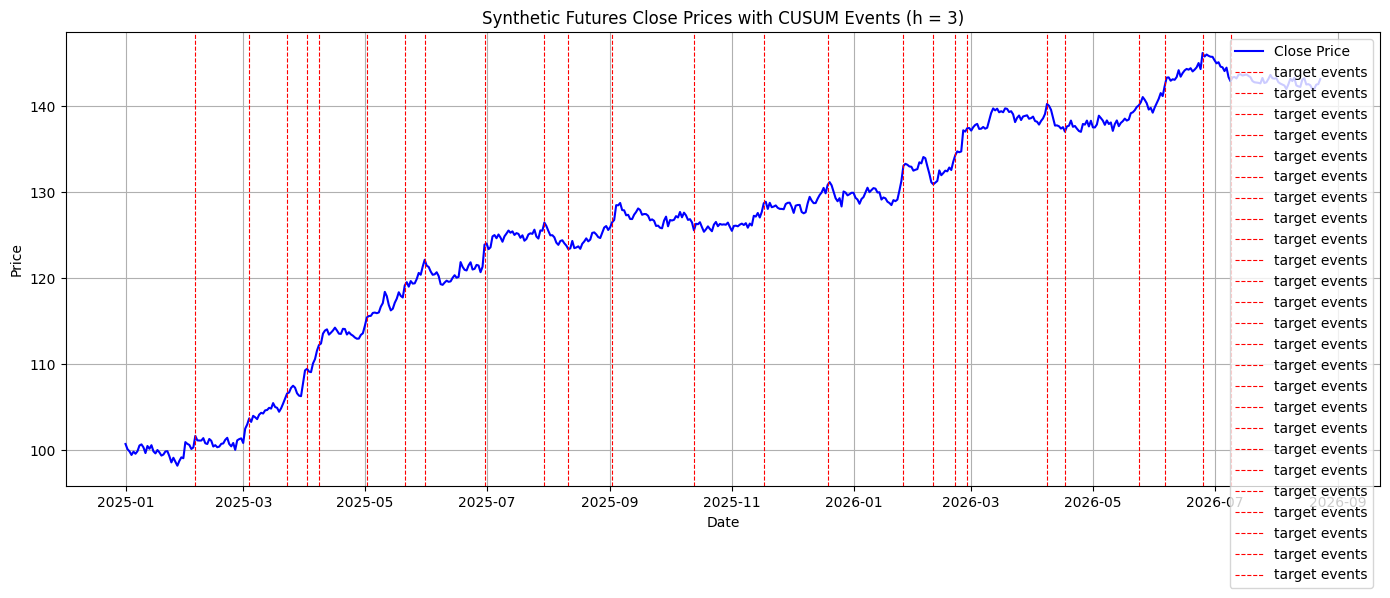

In [13]:
from AFML_book_scripts import get_CUSUM_events

h = 3
events = get_CUSUM_events(synthetic_df.close,h)

plt.figure(figsize=(14, 6))
plt.plot(synthetic_df['close'], label='Close Price', color='blue')

# Add vertical lines for events
for event in events:
    plt.axvline(event, color='red', linestyle='--', linewidth=0.8, label = 'target events')

plt.title(f"Synthetic Futures Close Prices with CUSUM Events (h = {h})")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()